**Stock Market Prediction**

Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Import Dataset

In [2]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [16]:
data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [17]:
data.describe()

,Open,High,Low,Close
count,1149.000000,1149.000000,1149.000000,1149.000000
mean,531.604517,535.816449,526.879608,674.775527
std,158.412156,159.593385,157.008123,112.582696
min,279.120000,281.210000,277.220000,491.200000
25%,391.560000,394.700000,388.230000,571.580000
50%,536.350000,539.600000,531.540000,673.690000
75%,689.980000,698.200000,683.650000,761.680000
max,816.680000,816.680000,805.140000,922.160000


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - loss: 0.0322 - 9s/epoch - 260ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0153 - 4s/epoch - 102ms/step
Epoch 3/20
35/35 - 3s - loss: 0.0095 - 3s/epoch - 97ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0077 - 4s/epoch - 103ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0128 - 4s/epoch - 102ms/step
Epoch 6/20
35/35 - 3s - loss: 0.0079 - 3s/epoch - 95ms/step
Epoch 7/20
35/35 - 3s - loss: 0.0074 - 3s/epoch - 98ms/step
Epoch 8/20
35/35 - 3s - loss: 0.0073 - 3s/epoch - 95ms/step
Epoch 9/20
35/35 - 3s - loss: 0.0066 - 3s/epoch - 93ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0065 - 4s/epoch - 105ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0059 - 4s/epoch - 112ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0071 - 4s/epoch - 106ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0063 - 4s/epoch - 106ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0061 - 4s/epoch - 110ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0051 - 4s/epoch - 110ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0050 - 4s/epoch - 114ms/step
Epoch 17/20
35/35 - 4s

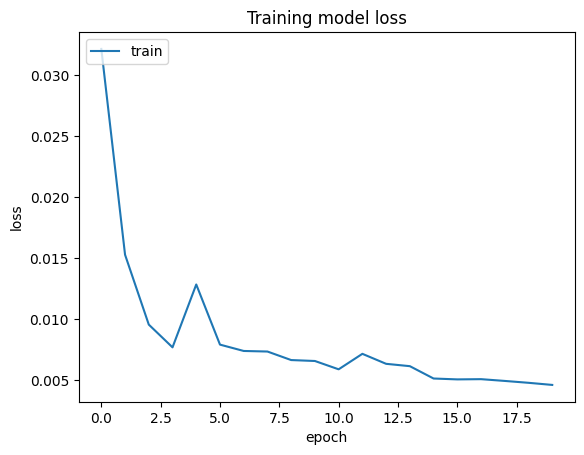

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 1s 27ms/step


array([[1.1656519],
       [1.1687384],
       [1.1791952],
       [1.195047 ],
       [1.2085739],
       [1.2103372],
       [1.1997924],
       [1.1834941],
       [1.171674 ],
       [1.1673288],
       [1.161022 ],
       [1.1511186],
       [1.1418688],
       [1.1332746],
       [1.1308159],
       [1.134469 ],
       [1.1502236],
       [1.1759626],
       [1.2061869],
       [1.2366024],
       [1.2508745],
       [1.2497709],
       [1.232343 ],
       [1.2055053],
       [1.1798158],
       [1.1636788],
       [1.1583917],
       [1.1574273],
       [1.151808 ],
       [1.1427628],
       [1.1322412],
       [1.1200237],
       [1.1019316],
       [1.079232 ],
       [1.0684001],
       [1.0751586],
       [1.0943849],
       [1.1178138],
       [1.1407285],
       [1.1536908],
       [1.1655252],
       [1.1790376],
       [1.1945806],
       [1.209341 ],
       [1.2197106],
       [1.2216883],
       [1.2134327],
       [1.204773 ],
       [1.2013276],
       [1.2054119],


In [14]:
predicted_price = sc.inverse_transform(y_pred)

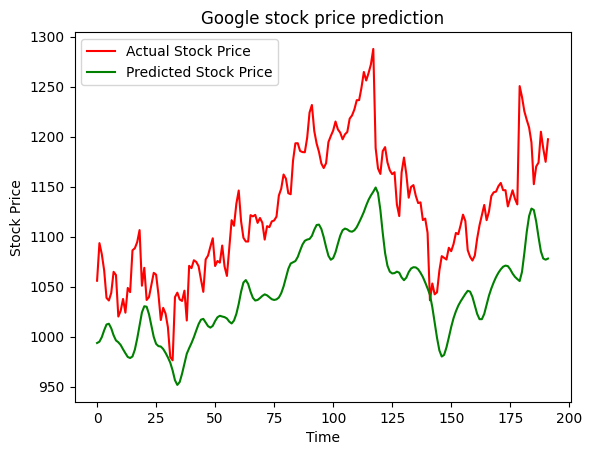

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()